In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD


In [2]:
df = pd.read_csv('/Users/SulMac/Desktop/MiskDSI/MLProject/California-housing/data/housing.csv')

In [57]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,average_rooms,average_bedrooms
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,0.908769,1.976970,0.405752
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874,1.004549,1.146020,0.265945
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.002547,0.000670
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,0.000000,1.522382,0.315537
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000,1.000000,1.937936,0.372404
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,1.000000,2.296090,0.444152
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000,55.222222,14.537042


In [4]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
#Replacing the nulls with the mean
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)

In [18]:
def map_age(age):
    if age == '<1H OCEAN':
        return 0
    elif age == 'INLAND':
        return 1
    elif age == 'NEAR OCEAN':
        return 2
    elif age == 'NEAR BAY':
        return 3
    elif age == 'ISLAND':
        return 4
df['ocean_proximity'] = df['ocean_proximity'].apply(map_age)

In [19]:
df['average_rooms']=df['total_rooms']/df['population']
df['average_bedrooms']=df['total_bedrooms']/df['population']




In [20]:
X=df[['longitude',
 'latitude',
 'housing_median_age',
 'population',
 'median_income',
 'ocean_proximity',
 'average_rooms',
 'average_bedrooms']]
Y=df['median_house_value']

In [21]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state=0)

In [22]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [26]:
y_pred = regressor.predict(X_test)

In [27]:
#Evaluating the model using R squared

from sklearn.metrics import r2_score
r2=r2_score(Y_test,y_pred)
print('the R squared of the linear regression is:', r2)

the R squared of the linear regression is: 0.5977401712566517


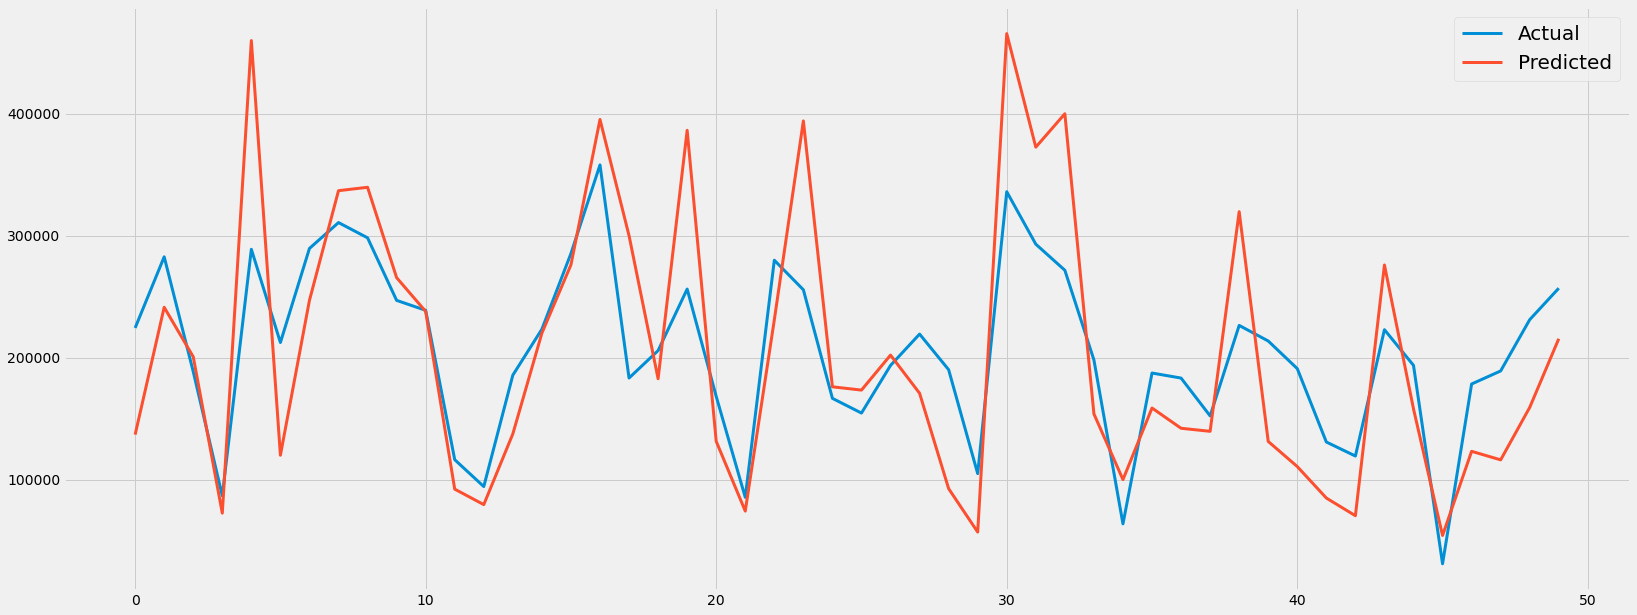

In [44]:

grp = pd.DataFrame({'prediction':y_pred,'Actual':Y_test})
grp = grp.reset_index()
grp = grp.drop(['index'],axis=1)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(25,10))
plt.plot(grp[:50],linewidth=3)
plt.legend(['Actual','Predicted'],prop={'size': 20})

# Using XGBoost model

In [45]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 1,eta=0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 2000)

In [46]:
xg_reg.fit(X_train,Y_train)

y_pred2 = xg_reg.predict(X_test)

[14:06:25] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [47]:
r2xgb=r2_score(Y_test,y_pred2)
print('the R squared of the xgboost method is:', r2xgb)

the R squared of the xgboost method is: 0.8498551074900893


Text(0.5, 0.98, 'The diffrence between Actual values and predictied values using XGB')

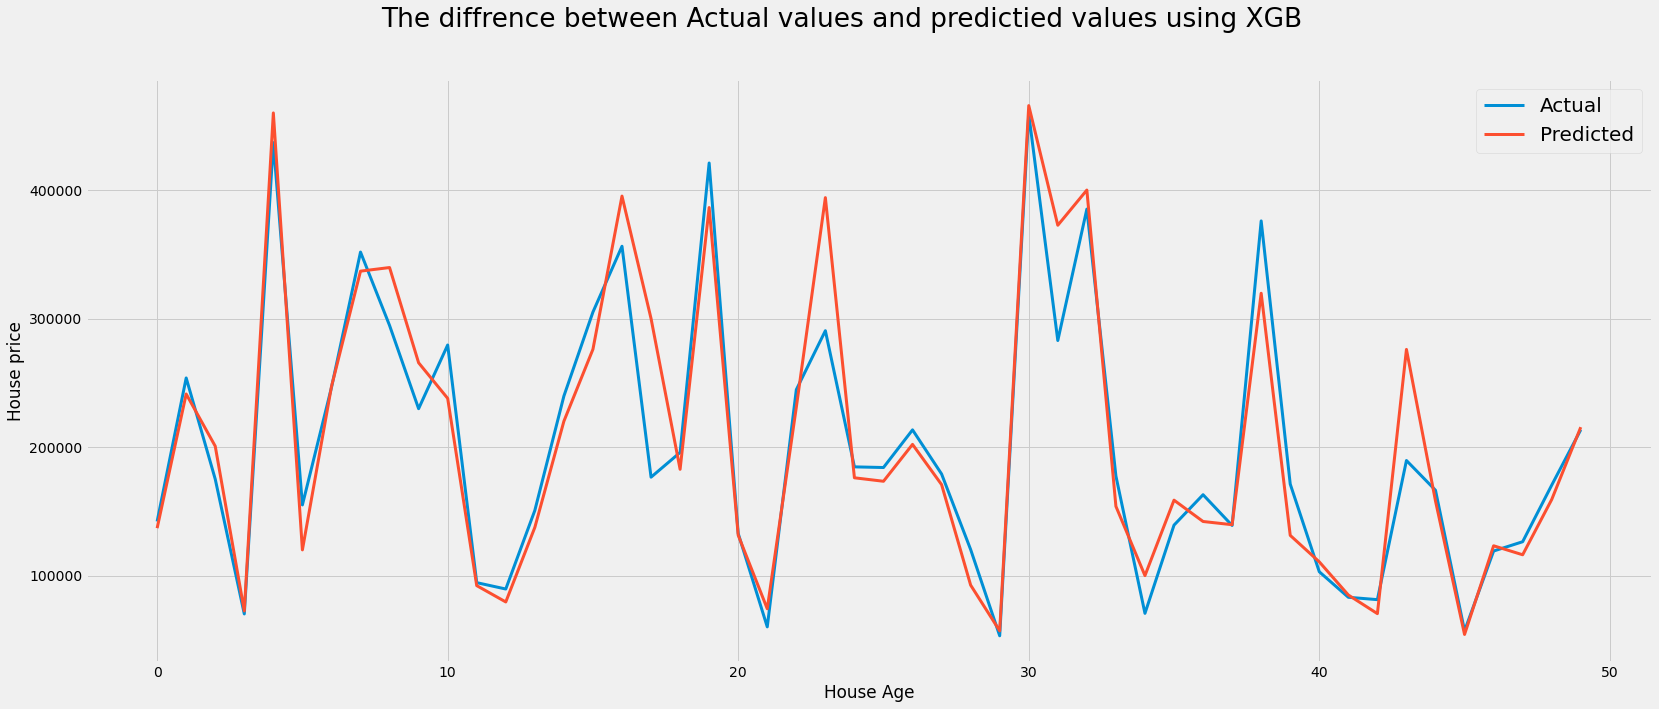

In [65]:
#Plotting the diffrence between Actual values and predictied values using XGB
grp = pd.DataFrame({'prediction':y_pred2,'Actual':Y_test})
grp = grp.reset_index()
grp = grp.drop(['index'],axis=1)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(25,10))
plt.plot(grp[:50],linewidth=3)
plt.legend(['Actual','Predicted'],prop={'size': 20})
plt.rcParams.update({'font.size': 22})
plt.xlabel("House Age")
plt.ylabel("House price")
plt.suptitle('The diffrence between Actual values and predictied values using XGB')